# Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
train = pd.read_csv (r'F:\FlipRobo Technologies\Internship13\Fake news project\train_news.csv')
train=pd.DataFrame(train)
train

Unnamed: 0     id                                           headline  \
0               0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1               1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2               2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3               3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4               4   7596                       A Digital 9/11 If Trump Wins   
...           ...    ...                                                ...   
20795       20795   5671                                                NaN   
20796       20796  14831        Albert Pike and the European Migrant Crisis   
20797       20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798       20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799       20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2      Sunday on ABC’s “This Week,” while discussing ...      0  
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4        Finian Cunningham has written extensively on...      1  
...                                                  ...    ...  
20795  No, you'll be a dog licking of the vomit of yo...      1  
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1  
20797  posted by Eddie You know the Dakota Access Pip...      1  
20798  It’s officially summer, and the Society Boutiq...      0  
20799  Emory University in Atlanta, Georgia, has anno...      0  

[20800 rows x 6 columns]

In [3]:
#It describes each column type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


In [4]:
train.shape

(20800, 6)

In [5]:
#Dropping unwanted columns
train.drop(columns=['Unnamed: 0','id'],axis=1,inplace=True)
train

headline  \
0      Ethics Questions Dogged Agriculture Nominee as...   
1      U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2      Cotton to House: ’Do Not Walk the Plank and Vo...   
3      Paul LePage, Besieged Maine Governor, Sends Co...   
4                           A Digital 9/11 If Trump Wins   
...                                                  ...   
20795                                                NaN   
20796        Albert Pike and the European Migrant Crisis   
20797  Dakota Access Caught Infiltrating Protests to ...   
20798  How to Stretch the Summer Solstice - The New Y...   
20799  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2      Sunday on ABC’s “This Week,” while discussing ...      0  
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4        Finian Cunningham has written extensively on...      1  
...                                                  ...    ...  
20795  No, you'll be a dog licking of the vomit of yo...      1  
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1  
20797  posted by Eddie You know the Dakota Access Pip...      1  
20798  It’s officially summer, and the Society Boutiq...      0  
20799  Emory University in Atlanta, Georgia, has anno...      0  

[20800 rows x 4 columns]

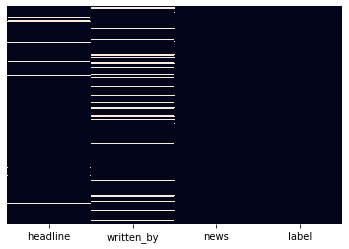

In [6]:
# checking null values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [7]:
train.isnull().sum()

headline       558
written_by    1957
news            39
label            0
dtype: int64

This Dataset has many null values. Author Name is missing in 1957 news.

In [8]:
#Checking whether both headline and news are NaN
train[train['news'].isna() & train['headline'].isna()]

Empty DataFrame
Columns: [headline, written_by, news, label]
Index: []

Every rows has news as headline or as description or having both. So no need to remove any rows.

In [9]:
#To avoid the NaN value effect, filling it with a hypen mark(-).
train.fillna('-',inplace=True)

In [10]:
train

headline  \
0      Ethics Questions Dogged Agriculture Nominee as...   
1      U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2      Cotton to House: ’Do Not Walk the Plank and Vo...   
3      Paul LePage, Besieged Maine Governor, Sends Co...   
4                           A Digital 9/11 If Trump Wins   
...                                                  ...   
20795                                                  -   
20796        Albert Pike and the European Migrant Crisis   
20797  Dakota Access Caught Infiltrating Protests to ...   
20798  How to Stretch the Summer Solstice - The New Y...   
20799  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2      Sunday on ABC’s “This Week,” while discussing ...      0  
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4        Finian Cunningham has written extensively on...      1  
...                                                  ...    ...  
20795  No, you'll be a dog licking of the vomit of yo...      1  
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1  
20797  posted by Eddie You know the Dakota Access Pip...      1  
20798  It’s officially summer, and the Society Boutiq...      0  
20799  Emory University in Atlanta, Georgia, has anno...      0  

[20800 rows x 4 columns]

In [11]:
#Checking the balancing of label values.
train['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

Both Fake and True News are equally balanced in the dataset.

In [12]:
#Top Authors in the dataset have created highest no. of news
train['written_by'].value_counts()[:10]

-                      1957
Pam Key                 243
admin                   193
Jerome Hudson           166
Charlie Spiering        141
John Hayward            140
Katherine Rodriguez     124
Warner Todd Huston      122
Ian Hanchett            119
Breitbart News          118
Name: written_by, dtype: int64

In [13]:
#Merging written_by, headline and news into one single column named as News.
train['News']=train['written_by']+' '+train['headline']+' '+train['news']
train.drop(columns=['written_by','headline','news'],axis=1,inplace=True)
train

label                                               News
0          0  Eric Lipton and Steve Eder Ethics Questions Do...
1          0  David Waldstein U.S. Must Dig Deep to Stop Arg...
2          0  Pam Key Cotton to House: ’Do Not Walk the Plan...
3          0  Jess Bidgood Paul LePage, Besieged Maine Gover...
4          1  Finian Cunningham A Digital 9/11 If Trump Wins...
...      ...                                                ...
20795      1  NeverSurrender - No, you'll be a dog licking o...
20796      1  Rixon Stewart Albert Pike and the European Mig...
20797      1  Eddy Lavine Dakota Access Caught Infiltrating ...
20798      0  Alison S. Cohn How to Stretch the Summer Solst...
20799      0  Tom Ciccotta Emory University to Pay for ’100 ...

[20800 rows x 2 columns]

In [14]:
#Length of the News
train['Length'] = train.News.str.len()
train

label                                               News  Length
0          0  Eric Lipton and Steve Eder Ethics Questions Do...    8048
1          0  David Waldstein U.S. Must Dig Deep to Stop Arg...    6201
2          0  Pam Key Cotton to House: ’Do Not Walk the Plan...     534
3          0  Jess Bidgood Paul LePage, Besieged Maine Gover...    6630
4          1  Finian Cunningham A Digital 9/11 If Trump Wins...    9211
...      ...                                                ...     ...
20795      1  NeverSurrender - No, you'll be a dog licking o...      86
20796      1  Rixon Stewart Albert Pike and the European Mig...    6679
20797      1  Eddy Lavine Dakota Access Caught Infiltrating ...    3530
20798      0  Alison S. Cohn How to Stretch the Summer Solst...    2405
20799      0  Tom Ciccotta Emory University to Pay for ’100 ...    2039

[20800 rows x 3 columns]

# Importing NLTK for reducing length of News text

In [15]:
import nltk   
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import  stopwords

In [16]:
stop_words = stopwords.words('english')

for i in range(len(train)):
    train['News'][i]=re.sub('[^a-z A-Z]',' ',train['News'][i])
    

train['News']=train['News'].str.lower()    

wl = WordNetLemmatizer()   

train['News'] = train['News'].apply(lambda x: ' '.join(wl.lemmatize(term) for term in x.split() if term not in stop_words))

train

label                                               News  Length
0          0  eric lipton steve eder ethic question dogged a...    8048
1          0  david waldstein u must dig deep stop argentina...    6201
2          0  pam key cotton house walk plank vote bill cann...     534
3          0  jess bidgood paul lepage besieged maine govern...    6630
4          1  finian cunningham digital trump win finian cun...    9211
...      ...                                                ...     ...
20795      1  neversurrender dog licking vomit chinese overlord      86
20796      1  rixon stewart albert pike european migrant cri...    6679
20797      1  eddy lavine dakota access caught infiltrating ...    3530
20798      0  alison cohn stretch summer solstice new york t...    2405
20799      0  tom ciccotta emory university pay percent undo...    2039

[20800 rows x 3 columns]

In [17]:
#Length after cleaning
train['clean_length'] = train.News.str.len()
train

label                                               News  Length  \
0          0  eric lipton steve eder ethic question dogged a...    8048   
1          0  david waldstein u must dig deep stop argentina...    6201   
2          0  pam key cotton house walk plank vote bill cann...     534   
3          0  jess bidgood paul lepage besieged maine govern...    6630   
4          1  finian cunningham digital trump win finian cun...    9211   
...      ...                                                ...     ...   
20795      1  neversurrender dog licking vomit chinese overlord      86   
20796      1  rixon stewart albert pike european migrant cri...    6679   
20797      1  eddy lavine dakota access caught infiltrating ...    3530   
20798      0  alison cohn stretch summer solstice new york t...    2405   
20799      0  tom ciccotta emory university pay percent undo...    2039   

       clean_length  
0              5342  
1              4012  
2               336  
3              4423  
4              6549  
...             ...  
20795            49  
20796          4359  
20797          2581  
20798          1638  
20799          1505  

[20800 rows x 4 columns]

In [18]:
print ('Original Length', train.Length.sum())
print ('Clean Length', train.clean_length.sum())

Original Length 96356687
Clean Length 63820297


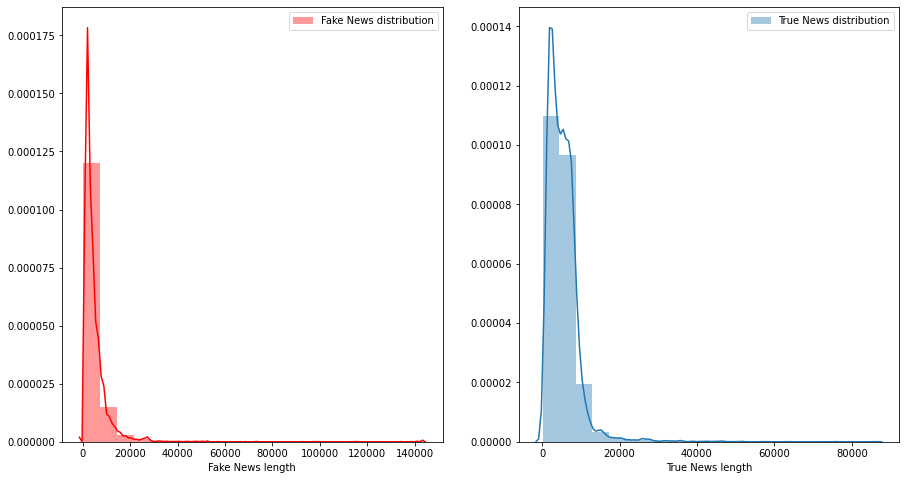

In [19]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['label']==1]['Length'],bins=20,ax=ax[0],label='Fake News distribution',color='r')

ax[0].set_xlabel('Fake News length')
ax[0].legend()

sns.distplot(train[train['label']==0]['Length'],bins=20,ax=ax[1],label='True News distribution')
ax[1].set_xlabel('True News length')
ax[1].legend()

plt.show()

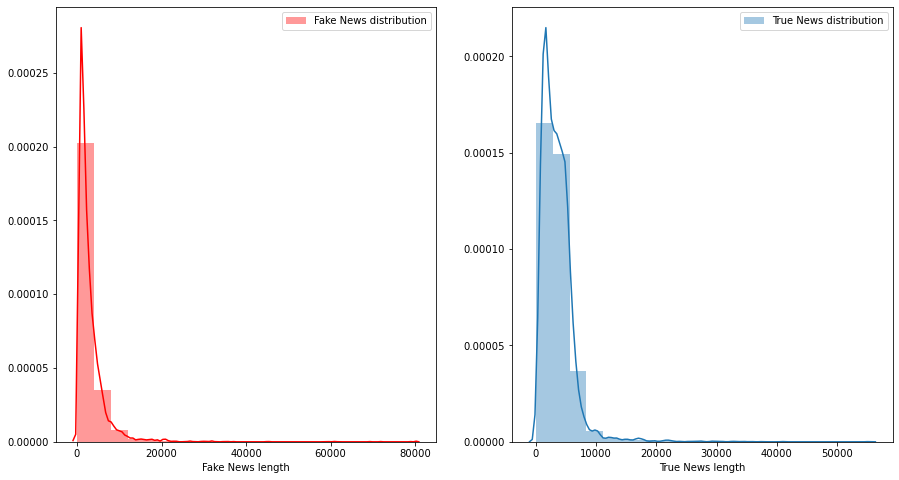

In [20]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['label']==1]['clean_length'],bins=20,ax=ax[0],label='Fake News distribution',color='r')
ax[0].set_xlabel('Fake News length')
ax[0].legend()

sns.distplot(train[train['label']==0]['clean_length'],bins=20,ax=ax[1],label='True News distribution')
ax[1].set_xlabel('True News length')
ax[1].legend()

plt.show()

In [21]:
#Transforming News text into a Vector matrix using Tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(train['News'])

x = features
y = train['label']

# Multiple Algorithms

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=42)
modelclf=[LogisticRegression(), DecisionTreeClassifier(), MultinomialNB(), RandomForestClassifier()]

for mc in modelclf:
    mc.fit(train_x,train_y)
    mc_y=mc.predict(test_x)
    print("Accuracy Score of",mc,"is",accuracy_score(test_y,mc_y))
    print("Confusion Matrix\n",confusion_matrix(test_y,mc_y))
    print("Classification Report\n", classification_report(test_y,mc_y))
    print("*******************************************************************")
    print("\n\n")

Accuracy Score of LogisticRegression() is 0.9567307692307693
Confusion Matrix
 [[2936  165]
 [ 105 3034]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      3101
           1       0.95      0.97      0.96      3139

    accuracy                           0.96      6240
   macro avg       0.96      0.96      0.96      6240
weighted avg       0.96      0.96      0.96      6240

*******************************************************************



Accuracy Score of DecisionTreeClassifier() is 0.9665064102564103
Confusion Matrix
 [[3001  100]
 [ 109 3030]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      3101
           1       0.97      0.97      0.97      3139

    accuracy                           0.97      6240
   macro avg       0.97      0.97      0.97      6240
weighted avg       0.97      0.97      0.97      6240

*************

### Decision Tree Classifier has the highest Accuracy Score of 96.6%.

# The Best Classifier

In [25]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
dtc_y=dtc.predict(test_x)

print("Accuracy Score of Decision Tree Classifier is",accuracy_score(test_y,dtc_y))
print("Confusion Matrix\n",confusion_matrix(test_y,dtc_y))
print("Classification Report\n", classification_report(test_y,dtc_y))

Accuracy Score of Decision Tree Classifier is 0.9623397435897436
Confusion Matrix
 [[2982  119]
 [ 116 3023]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3101
           1       0.96      0.96      0.96      3139

    accuracy                           0.96      6240
   macro avg       0.96      0.96      0.96      6240
weighted avg       0.96      0.96      0.96      6240



# AUC_ROC Curve

In [26]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [27]:
y_pred_prob=dtc.predict_proba(test_x)
y_pred_prob

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [28]:
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, y_pred_prob[:,i], pos_label=i)

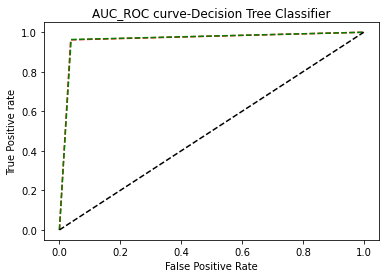

In [29]:
#Plotting AUC_ROC Curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='red')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green')
plt.title('AUC_ROC curve-Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.plot([0,1],[0,1],'k--')
plt.show()

# Saving the Model

In [31]:
import pickle

filename='Fake_News_Project_dtc.pkl'
pickle.dump(dtc,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(test_x)

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)